<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/assignment/Stochastic_Methods_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1. Multivariate Gaussian Distributions (2 points)

Assuming that the joint PDF of two random variables $x$ and $y$ reads $P(x,y)=\frac{1}{N}\exp{(−x^2−y^2−xy)}$. Compute:
- (a) Normalisation constant $N$ ,
- (b) marginal PDF $P(x)$,
- (c) find the conditional probability $P(x|y)$ and
- (d) the averages $⟨x^2y^2⟩,⟨xy^3⟩$

### Answer to Problem 1.

Let $P(x,y)$ be the joint PDF of two random variables $x$ and $y$, $P(x,y)=\frac{1}{N}\exp{(−x^2−y^2−xy)}$. For some matrix $A$, We can write $P(x,y)$ as:  
 $$P(x,y)=\frac{1}{N}\exp{\left(-\frac{1}{2}\left(\begin{matrix}x&y\end{matrix}\right)A\left(\begin{matrix}x\\y\end{matrix}\right)\right)} \; , \; A=\left(\begin{matrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{matrix}\right)$$
$$⇒a_{11}x^2+(a_{12}+a_{21})xy+a_{22}y^2=2x^2+2xy+2y^2$$
$$⇒ A=\left(\begin{matrix}2&1\\1&2\end{matrix}\right)\; ,\; \det(A)=3$$

- (a) The normalisation constant $N$ satisfy:  
$$N=\frac{(2\pi)^{(2/2)}}{\sqrt{\det(A)}}=\frac{2\pi}{\sqrt{3}}$$
Hence $P(x,y)=\frac{\sqrt{3}}{2\pi}\exp{(-x^2-xy-y^2)}$

- (b) marginal PDF $P(x)$.  
$$P(x)=\displaystyle \int_{-\infty}^\infty P(x,y)dy= \frac{\sqrt{3}}{2\pi}\int_{-\infty}^\infty \exp{(-(y+x/2)^2+x^2/4-x^2)}dy=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\int_{-\infty}^\infty \exp{(-(y+x/2)^2)}dy=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\sqrt{\pi}=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\int_{-\infty}^\infty \exp{(-(y+x/2)^2)}dy=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}x^2)}$$
$$P(x)=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}x^2)}$$

- (c) The conditional probability $P(x|y)$  
From the symmetricity of the above matrix $A$, we have that $P(y)=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}y^2)}$
$$P(x|y)=\frac{P(x,y)}{P(y)}=\frac{\sqrt{3}}{2\pi}\frac{2\sqrt{\pi}}{\sqrt{3}}\frac{\exp{(-x^2-xy-y^2)}}{\exp{(-3/4y^2)}}=\frac{1}{\sqrt{\pi}}\exp{(-x^2-xy-y^2/4)}$$

- The averages $⟨x^2y^2⟩,⟨xy^3⟩$.   
$$⟨x^2y^2⟩=\int_{\mathbb{R}}dx\int_{\mathbb{R}}dy(x^2y^2P(x,y))=\frac{\sqrt{3}}{2\pi}\int_{\mathbb{R}}dx\int_{\mathbb{R}}x^2y^2\exp{(-x^2-xy-y^2)dy}$$

$$⟨xy^3⟩=\int_{\mathbb{R}}dx\int_{\mathbb{R}}dy(xy^3P(x,y))=\frac{\sqrt{3}}{2\pi}\int_{\mathbb{R}}dx\int_{\mathbb{R}}xy^3\exp{(-x^2-xy-y^2)dy}$$

However, we can compute it using Wick;s Isserlis' theorem.

$$A=\left(\begin{matrix}2&1\\1&2 \end{matrix} \right);A^{-1}=\left(\begin{matrix}\frac{2}{3}&-\frac{1}{3}\\-\frac{1}{3}&\frac{2}{3}\end{matrix} \right) ⇒ \mathbb{E}[x,y]=\mathbb{E}[y,x]=-\frac{1}{3} ; \mathbb{E}[x,x]=\mathbb{E}[y,y]=\frac{2}{3}$$
$\mathbb{E}[x^2y^2]=\mathbb{E}[x,x]\mathbb{E}[y,y]+2\mathbb{E}[x,y]^2=\frac{2}{3}$  
$\mathbb{E}[xy^3]=3\mathbb{E}[x,y]\mathbb{E}[y,y]=-\frac{2}{3}$


### Problem 2. Eigenvalue distributions for Random Matrices (3 points)

Random matrix theory is applied towards a diverse set of systems ranging from physics of heavy nuclei and disordered systems to optimal control theory and deep learning. A random matrix is any matrix with random numbers as elements.   In this problem you will reproduces some of the well-known classical results for Gaussian orthogonal ensemble (GOE) matrices. These matrices are symmetric and can be generated by producing the corresponding element values from $N(0, 1)$ distribution.  

- **Wigner semi-circle**. Plot the spectrum of the eigenvalues of GOE matrix N ×N with N = 5000.
Check that your histogram can be well approximated by a semi-circle.
- **Wigner’s surmise**. Using the same matrix you generated in the previous step check the
distribution of spacing between consecutive eigenvalues. Plot the function $\frac{πs}{2}\exp{(−πs^2/4)}$ on top of the histogram (where $s$ is the spacing distance)
- **Tracy-Widom**. Plot the largest eigenvalues of 1000 of 1000 × 1000 GOE matrices. Add the
analytical curve for the Tracy-Widom distribution on top of the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Generate a GOE matrix
N = 5000
A = np.random.randn(N, N)
A = (A + A.T) / 2  # Ensure symmetry

# Compute eigenvalues
eigenvalues = np.linalg.eigvalsh(A)


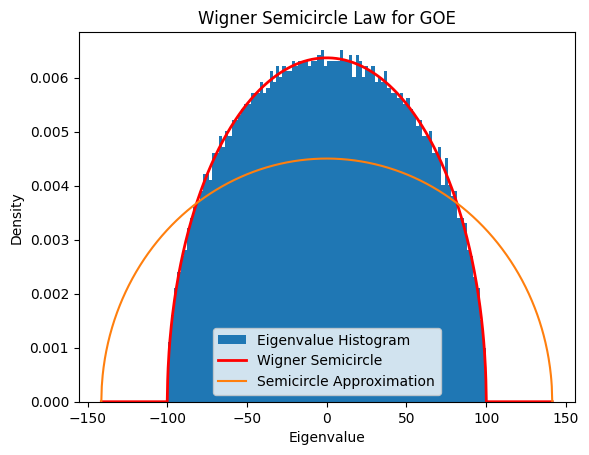

In [2]:

# Plot the histogram of eigenvalues
plt.hist(eigenvalues, bins=100, density=True, label='Eigenvalue Histogram')

# Plot the Wigner semicircle distribution
x = np.linspace(-np.sqrt(4*N), np.sqrt(4*N), 1000)
y = sp.stats.semicircular.pdf(x, scale=np.sqrt(2*N))
plt.plot(x, y, 'r-', lw=2, label='Wigner Semicircle')


# Calculate the semicircle approximation
R = 2 * np.sqrt(N)
x = np.linspace(-R, R, 1000)
y = (2 / (np.pi * R**2)) * np.sqrt(R**2 - x**2)

# Plot the semicircle approximation
plt.plot(x, y, label='Semicircle Approximation')


plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.title('Wigner Semicircle Law for GOE')
plt.legend()
plt.show()

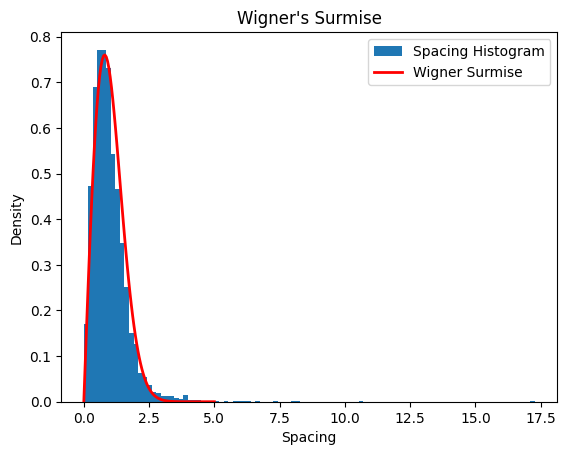

In [3]:
# Calculate spacings
spacings = np.diff(np.sort(eigenvalues))

# Normalize spacings
mean_spacing = np.mean(spacings)
normalized_spacings = spacings / mean_spacing

# Plot the histogram of spacings
plt.hist(normalized_spacings, bins=100, density=True, label='Spacing Histogram')

# Plot the Wigner surmise
x = np.linspace(0, 5, 100)
y = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)
plt.plot(x, y, 'r-', lw=2, label='Wigner Surmise')

plt.xlabel('Spacing')
plt.ylabel('Density')
plt.title("Wigner's Surmise")
plt.legend()
plt.show()

In [6]:
# Function to generate GOE matrices and extract largest eigenvalues
def generate_largest_eigenvalues(num_matrices, N):
    largest_eigenvalues = []
    for _ in range(num_matrices):
        A = np.random.randn(N, N)
        A = (A + A.T) / 2
        eigenvalues = np.linalg.eigvalsh(A)
        largest_eigenvalues.append(np.max(eigenvalues))
    return largest_eigenvalues

# Parameters
num_matrices = 1000
N = 1000

# Generate largest eigenvalues
largest_eigenvalues = generate_largest_eigenvalues(num_matrices, N)



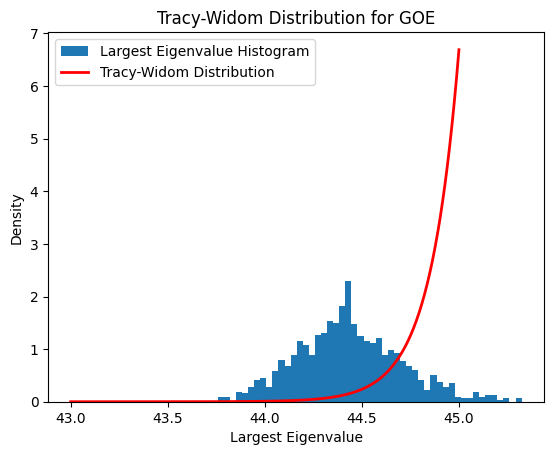

In [27]:
def tracy_widom_pdf(x):
    mu = -1.20653
    sigma = 1.26806
    a = (x - mu) / sigma
    return np.exp(-2/3 * a**3 - 2**(1/3) * a) / (np.sqrt(2 * np.pi) * sigma)

# Plot the histogram of largest eigenvalues
plt.hist(largest_eigenvalues, bins=50, density=True, label='Largest Eigenvalue Histogram')

# Calculate and plot Tracy-Widom distribution using scipy.special
x = np.linspace(43,45, 1000)
y = tracy_widom_distribution(x)

# Normalize the Tracy-Widom distribution
y /= np.trapz(y, x)
plt.plot(x, y, 'r-', lw=2, label='Tracy-Widom Distribution')

plt.xlabel('Largest Eigenvalue')
plt.ylabel('Density')
plt.title('Tracy-Widom Distribution for GOE')
plt.legend()
plt.show()